<a href="https://colab.research.google.com/github/iShraddha24/EDA-and-sentiment-analysis/blob/main/EDA_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats


In [2]:
df = pd.read_csv('MergedReviews.csv')

In [3]:
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2SSSH04J4J264,B0D4STD5ZC,5.0 out of 5 stars Really nice portable speake...,Bruce C,5,Needed a new portable speaker for the home set...,"Reviewed in the United States July 1, 2024",AFVM53KRAU5JC462ZZDBBKTESPGA,True,9,Color: Statement RedStyle: PillPattern: Withou...
1,R1ZHHB1YMHA1IF,B0D4STD5ZC,5.0 out of 5 stars Get a pair! You won’t regre...,I D Yelle,5,The Beats Pill (2024) has made a triumphant co...,"Reviewed in the United States June 29, 2024",AHO3EI5OGMXQFUMRJBH665YZXMBQ,True,18,Color: Matte BlackStyle: PillPattern: Without ...
2,R39X7USU3OX34C,B0D4STD5ZC,5.0 out of 5 stars Really good,Justin,5,So I’m super picky about sound and have spent ...,"Reviewed in the United States July 8, 2024",AFSZPNTTLYCLNP536L6VS6UMFTNQ,True,2,Color: Statement RedStyle: PillPattern: Withou...
3,R4BQHA0TLLJNN,B0D4STD5ZC,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",AEUCX7EIPTMCFN4OJBZHL2OYSVKQ,True,1,Color: Champagne GoldStyle: PillPattern: Witho...
4,R102ZHXOOGDR18,B0D4STD5ZC,5.0 out of 5 stars Amazing sound for the size,Maxy D,5,This 2 pound speaker sounds insane for its siz...,"Reviewed in the United States July 19, 2024",AHNNPIFNRYHXRAOIN2G7WIJQDWEA,True,1,Color: Champagne GoldStyle: PillPattern: Witho...


In [4]:
df.columns

Index(['review_id', 'product_id', 'title', 'author', 'rating', 'content',
       'timestamp', 'profile_id', 'is_verified', 'helpful_count',
       'product_attributes'],
      dtype='object')

In [5]:
df.dtypes

review_id             object
product_id            object
title                 object
author                object
rating                 int64
content               object
timestamp             object
profile_id            object
is_verified             bool
helpful_count          int64
product_attributes    object
dtype: object

In [6]:
df.describe()

,rating,helpful_count
count,382.000000,382.000000
mean,4.541885,4.109948
std,0.811385,26.851169
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,441.000000


In [7]:
df.describe(include='object')

,review_id,product_id,title,author,content,timestamp,profile_id,product_attributes
count,382,382,382,382,382,382,382,376
unique,382,6,362,368,382,234,382,20
top,R2SSSH04J4J264,B07WNZS2FR,5.0 out of 5 stars Great speaker,Amazon Customer,Needed a new portable speaker for the home set...,"Reviewed in the United States July 1, 2024",AFVM53KRAU5JC462ZZDBBKTESPGA,Color: Black
freq,1,100,9,14,1,11,1,98


In [8]:
df['helpful_count']

0       9
1      18
2       2
3       1
4       1
       ..
377     0
378     0
379     1
380     1
381     2
Name: helpful_count, Length: 382, dtype: int64

In [9]:
df['review_id'].unique()

array(['R2SSSH04J4J264', 'R1ZHHB1YMHA1IF', 'R39X7USU3OX34C',
       'R4BQHA0TLLJNN', 'R102ZHXOOGDR18', 'RHW0NI1KI798M',
       'RBHF1HBE7ZJGU', 'R3EOM3PFJ90D5Y', 'R2GXSMDM76M1NO',
       'R3M5VB492MOE7C', 'R3K1D2NKBRSOJ6', 'RQB2MZ06ANO68',
       'R18C9SGI40K03G', 'R1FPGFHZ07V4CD', 'R3C1OVXH7NLME2',
       'R35DQABEPYTVK6', 'R2KLZXER7B0LQF', 'R2IL021SJK8WQR',
       'R3J6TCVCK04ACX', 'R3Q3M1BASZJ2BM', 'R2RH6ETU2EFCPR',
       'R3A0CT3JVYDFX3', 'R1IDSWYH8GDHSG', 'R31FPPEOE54HHH',
       'RCS6YZDDME20Y', 'R2W2XN52WGT97C', 'R1UNWOCI4XII', 'RUYA2OVG0565',
       'R1WGS76J7H1664', 'R2F0KIF8NGTETI', 'R2LR6Z1P8R9XRY',
       'R13BNKZHOFP9ZY', 'R38GQ5W13HCMHD', 'R3OEQ3IQDA17MM',
       'R1Q9V2VB0PBDGS', 'RS2F0P510KB7D', 'R16YQMK6DBJQBM',
       'R2H42JDX6Y37E', 'R3KPQBYL6X3PQX', 'R3L2A88GOC5G6I',
       'R99X2DXJ9IWPM', 'R1RPKEE8ZD6IDK', 'R2P869SICCNA92',
       'R2QY44WYCFBWJC', 'R2AZKVK2QLG02I', 'R239YJPPOUEGT8',
       'R2ZHSJAUA1YDXF', 'R10QS5VTTGXI96', 'R3B55FJBX5IMJT',
       'R2U08TLG8L

In [10]:
df.isnull().sum()

review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    6
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64

In [13]:
print(df.head())

        review_id  product_id  \
0  R2SSSH04J4J264  B0D4STD5ZC   
1  R1ZHHB1YMHA1IF  B0D4STD5ZC   
2  R39X7USU3OX34C  B0D4STD5ZC   
3   R4BQHA0TLLJNN  B0D4STD5ZC   
4  R102ZHXOOGDR18  B0D4STD5ZC   

                                               title     author  rating  \
0  5.0 out of 5 stars Really nice portable speake...    Bruce C       5   
1  5.0 out of 5 stars Get a pair! You won’t regre...  I D Yelle       5   
2                     5.0 out of 5 stars Really good     Justin       5   
3  5.0 out of 5 stars The best Speaker I have eve...       Leox       5   
4      5.0 out of 5 stars Amazing sound for the size     Maxy D       5   

                                             content  \
0  Needed a new portable speaker for the home set...   
1  The Beats Pill (2024) has made a triumphant co...   
2  So I’m super picky about sound and have spent ...   
3  I really like the new Beats Pill 2024 speaker....   
4  This 2 pound speaker sounds insane for its siz...   

             

In [14]:
# Identify outliers using z-score
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    z = np.abs(stats.zscore(df[col]))
    outliers = df[z > 3]
    print(f"Outliers in column '{col}': {outliers}")

Outliers in column 'rating':           review_id  product_id  \
19   R3Q3M1BASZJ2BM  B0D4STD5ZC   
20   R2RH6ETU2EFCPR  B0D4STD5ZC   
55   R2UKKBU3YA3HSM  B00AARRS9Y   
216  R35WM5Q96TDIMI  B07WNZS2FR   
235   RNY511O0P5F76  B07WNZS2FR   
245  R2IW1U9511PO3Z  B07WNZS2FR   
254  R37YYY6KVB625O  B07WNZS2FR   
260  R2NTRY4FGEZ8E4  B07WNZS2FR   
261  R2P5TXLAPBI2AA  B07WNZS2FR   
323  R2RZ6W43OGMY3S  B07PMBCTSY   
333  R2B66HRQSVSQRX  B07PMBCTSY   
335  R2UVMLTSLEG970  B07PMBCTSY   
360  R3JT7T0Q1PUZMD  B07PMBCTSY   
369  R2Q2K1R0S0QLGC  B07PMBCTSY   
371  R3BLMYLGIKNCHT  B07PMBCTSY   
372   RDNOHVXV7DNWG  B07PMBCTSY   
375  R36MOXXOJEGEVB  B07PMBCTSY   

                                                 title           author  \
19           2.0 out of 5 stars Good functionality but                S   
20                   1.0 out of 5 stars Buggy software     Oomung Varma   
55   2.0 out of 5 stars Great speaker, bad micropho...            Chris   
216  2.0 out of 5 stars This was an awes

In [15]:
# Handle outliers
df_cleaned = df.copy()
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    z = np.abs(stats.zscore(df_cleaned[col]))
    df_cleaned.loc[z > 3, col] = df_cleaned[col].median()
print("Cleaned DataFrame:")
print(df_cleaned)

Cleaned DataFrame:
          review_id  product_id  \
0    R2SSSH04J4J264  B0D4STD5ZC   
1    R1ZHHB1YMHA1IF  B0D4STD5ZC   
2    R39X7USU3OX34C  B0D4STD5ZC   
3     R4BQHA0TLLJNN  B0D4STD5ZC   
4    R102ZHXOOGDR18  B0D4STD5ZC   
..              ...         ...   
377  R2J5SQ9JH0164I  B07PMBCTSY   
378  R2MHN1G303X9TT  B07PMBCTSY   
379  R1IY3TBRNYM52W  B07PMBCTSY   
380  R20BDNNJBGMD0T  B07PMBCTSY   
381   RDFSNF22DKH9L  B07PMBCTSY   

                                                 title             author  \
0    5.0 out of 5 stars Really nice portable speake...            Bruce C   
1    5.0 out of 5 stars Get a pair! You won’t regre...          I D Yelle   
2                       5.0 out of 5 stars Really good             Justin   
3    5.0 out of 5 stars The best Speaker I have eve...               Leox   
4        5.0 out of 5 stars Amazing sound for the size             Maxy D   
..                                                 ...                ...   
377                 5

In [16]:
# Identify outliers using IQR
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in column '{col}': {outliers}")

Outliers in column 'rating':           review_id  product_id  \
19   R3Q3M1BASZJ2BM  B0D4STD5ZC   
20   R2RH6ETU2EFCPR  B0D4STD5ZC   
55   R2UKKBU3YA3HSM  B00AARRS9Y   
216  R35WM5Q96TDIMI  B07WNZS2FR   
235   RNY511O0P5F76  B07WNZS2FR   
245  R2IW1U9511PO3Z  B07WNZS2FR   
254  R37YYY6KVB625O  B07WNZS2FR   
260  R2NTRY4FGEZ8E4  B07WNZS2FR   
261  R2P5TXLAPBI2AA  B07WNZS2FR   
323  R2RZ6W43OGMY3S  B07PMBCTSY   
333  R2B66HRQSVSQRX  B07PMBCTSY   
335  R2UVMLTSLEG970  B07PMBCTSY   
360  R3JT7T0Q1PUZMD  B07PMBCTSY   
369  R2Q2K1R0S0QLGC  B07PMBCTSY   
371  R3BLMYLGIKNCHT  B07PMBCTSY   
372   RDNOHVXV7DNWG  B07PMBCTSY   
375  R36MOXXOJEGEVB  B07PMBCTSY   

                                                 title           author  \
19           2.0 out of 5 stars Good functionality but                S   
20                   1.0 out of 5 stars Buggy software     Oomung Varma   
55   2.0 out of 5 stars Great speaker, bad micropho...            Chris   
216  2.0 out of 5 stars This was an awes

In [17]:
# Handle outliers using IQR
df_cleaned = df.copy()
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    q1 = df_cleaned[col].quantile(0.25)
    q3 = df_cleaned[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = df_cleaned[col].median()
print("Cleaned DataFrame:")
print(df_cleaned)

Cleaned DataFrame:
          review_id  product_id  \
0    R2SSSH04J4J264  B0D4STD5ZC   
1    R1ZHHB1YMHA1IF  B0D4STD5ZC   
2    R39X7USU3OX34C  B0D4STD5ZC   
3     R4BQHA0TLLJNN  B0D4STD5ZC   
4    R102ZHXOOGDR18  B0D4STD5ZC   
..              ...         ...   
377  R2J5SQ9JH0164I  B07PMBCTSY   
378  R2MHN1G303X9TT  B07PMBCTSY   
379  R1IY3TBRNYM52W  B07PMBCTSY   
380  R20BDNNJBGMD0T  B07PMBCTSY   
381   RDFSNF22DKH9L  B07PMBCTSY   

                                                 title             author  \
0    5.0 out of 5 stars Really nice portable speake...            Bruce C   
1    5.0 out of 5 stars Get a pair! You won’t regre...          I D Yelle   
2                       5.0 out of 5 stars Really good             Justin   
3    5.0 out of 5 stars The best Speaker I have eve...               Leox   
4        5.0 out of 5 stars Amazing sound for the size             Maxy D   
..                                                 ...                ...   
377                 5

In [18]:
df.columns

Index(['review_id', 'product_id', 'title', 'author', 'rating', 'content',
       'timestamp', 'profile_id', 'is_verified', 'helpful_count',
       'product_attributes'],
      dtype='object')

To convert categorical columns into numerical varaibles ,
let's proceed with one-hot encoding for the categorical columns. We'll apply one-hot encoding to product_id, author, and profile_id columns.

In [19]:
# Apply one-hot encoding to the 'product_id', 'author', and 'profile_id' columns
df_encoded = pd.get_dummies(df, columns=['product_id', 'author', 'profile_id'])
print(df_encoded.head())

        review_id                                              title  rating  \
0  R2SSSH04J4J264  5.0 out of 5 stars Really nice portable speake...       5   
1  R1ZHHB1YMHA1IF  5.0 out of 5 stars Get a pair! You won’t regre...       5   
2  R39X7USU3OX34C                     5.0 out of 5 stars Really good       5   
3   R4BQHA0TLLJNN  5.0 out of 5 stars The best Speaker I have eve...       5   
4  R102ZHXOOGDR18      5.0 out of 5 stars Amazing sound for the size       5   

                                             content  \
0  Needed a new portable speaker for the home set...   
1  The Beats Pill (2024) has made a triumphant co...   
2  So I’m super picky about sound and have spent ...   
3  I really like the new Beats Pill 2024 speaker....   
4  This 2 pound speaker sounds insane for its siz...   

                                     timestamp  is_verified  helpful_count  \
0   Reviewed in the United States July 1, 2024         True              9   
1  Reviewed in the United 

In [20]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

Descriptive Dtatistics (mean, median, mode, variance, standard deviation).

In [30]:
file_path = 'MergedReviews.csv'

In [33]:
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Select only numeric columns
n_data = data.select_dtypes(include=[np.number])


        review_id  product_id  \
0  R2SSSH04J4J264  B0D4STD5ZC   
1  R1ZHHB1YMHA1IF  B0D4STD5ZC   
2  R39X7USU3OX34C  B0D4STD5ZC   
3   R4BQHA0TLLJNN  B0D4STD5ZC   
4  R102ZHXOOGDR18  B0D4STD5ZC   

                                               title     author  rating  \
0  5.0 out of 5 stars Really nice portable speake...    Bruce C       5   
1  5.0 out of 5 stars Get a pair! You won’t regre...  I D Yelle       5   
2                     5.0 out of 5 stars Really good     Justin       5   
3  5.0 out of 5 stars The best Speaker I have eve...       Leox       5   
4      5.0 out of 5 stars Amazing sound for the size     Maxy D       5   

                                             content  \
0  Needed a new portable speaker for the home set...   
1  The Beats Pill (2024) has made a triumphant co...   
2  So I’m super picky about sound and have spent ...   
3  I really like the new Beats Pill 2024 speaker....   
4  This 2 pound speaker sounds insane for its siz...   

             

In [34]:
# Calculate descriptive statistics for numeric columns
mean = n_data.mean()
median = n_data.median()
mode = n_data.mode().iloc[0]
variance = n_data.var()
std_deviation = n_data.std()

# Print the results
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nVariance:\n", variance)
print("\nStandard Deviation:\n", std_deviation)

Mean:
 rating           4.541885
helpful_count    4.109948
dtype: float64

Median:
 rating           5.0
helpful_count    0.0
dtype: float64

Mode:
 rating           5
helpful_count    0
Name: 0, dtype: int64

Variance:
 rating             0.658346
helpful_count    720.985255
dtype: float64

Standard Deviation:
 rating            0.811385
helpful_count    26.851169
dtype: float64


Data Visualization (histograms, box plots, scatter plots, heatmaps)

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
#set plot style
plt.style.use(style = "seaborn-darkgrid")

<ipython-input-43-9cd277a8f254>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style = "seaborn-darkgrid")


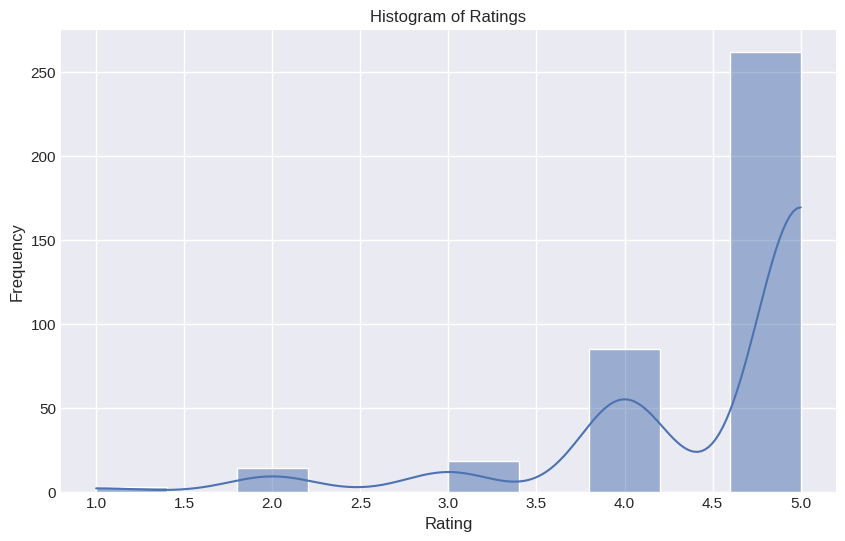

In [44]:
#histograms
# Histogram for 'rating'
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

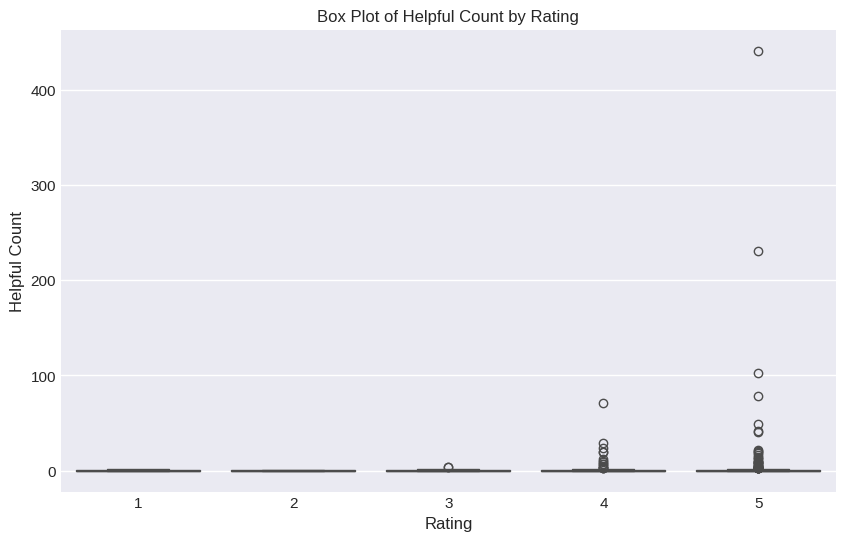

In [45]:
# Box plot for 'rating' and 'helpful_count'
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='helpful_count', data=data)
plt.title('Box Plot of Helpful Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.show()

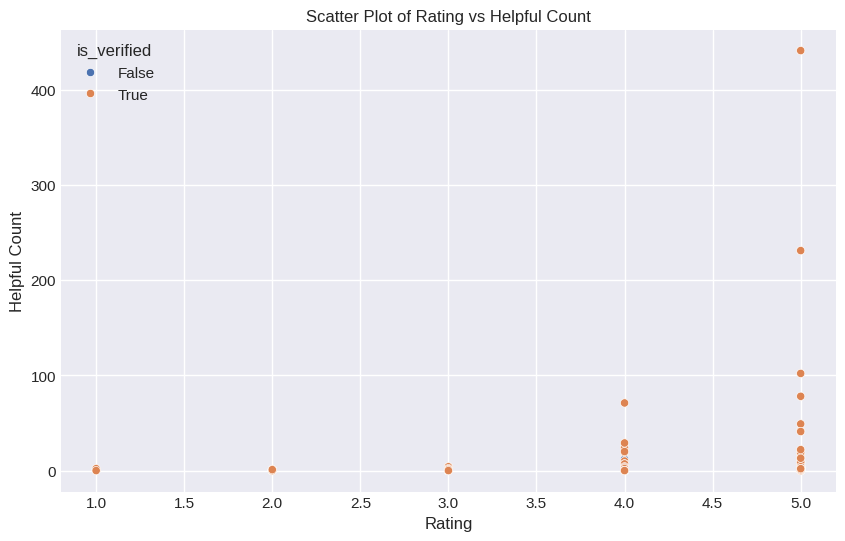

In [46]:
# Scatter plot for 'rating' vs 'helpful_count'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='helpful_count', hue='is_verified', data=data)
plt.title('Scatter Plot of Rating vs Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.show()

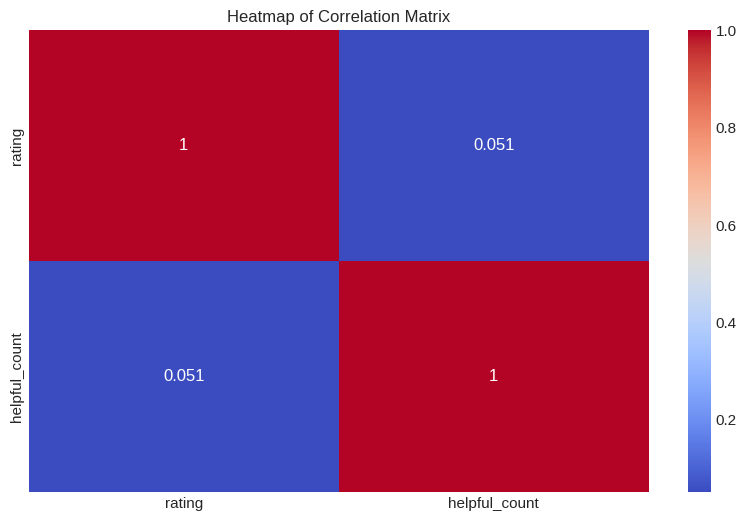

In [48]:
# Heatmap for correlation between numeric variables
plt.figure(figsize=(10, 6))
corr_matrix = n_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

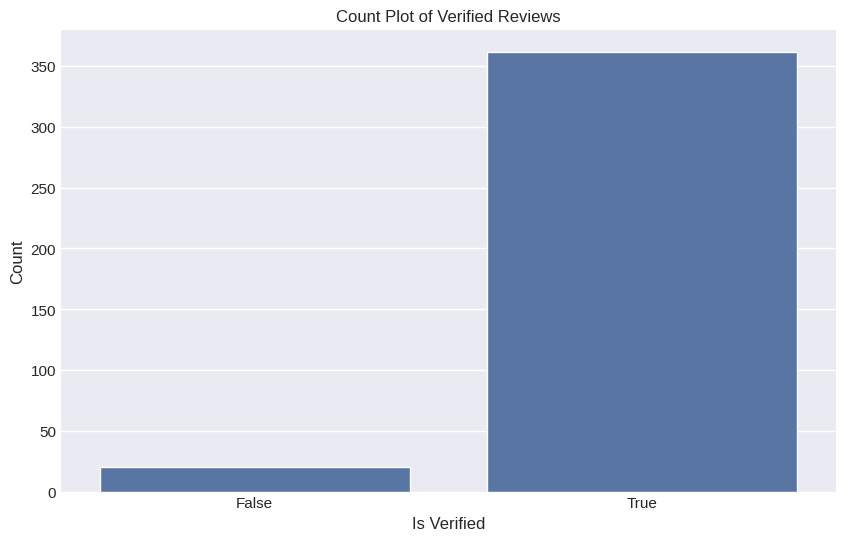

In [49]:
# Bar plot for 'is_verified'
plt.figure(figsize=(10, 6))
sns.countplot(x='is_verified', data=data)
plt.title('Count Plot of Verified Reviews')
plt.xlabel('Is Verified')
plt.ylabel('Count')
plt.show()

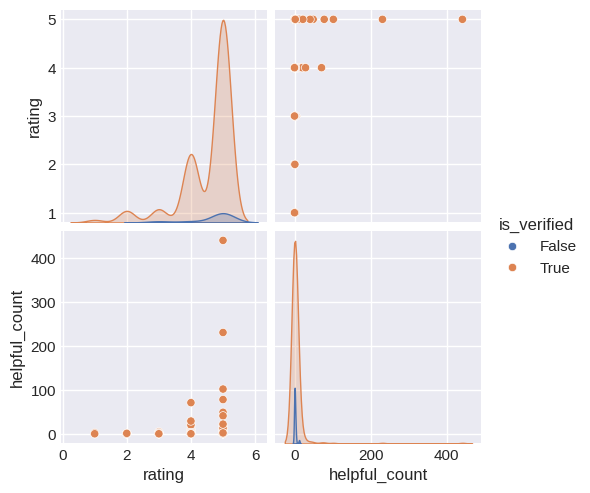

In [50]:
# Pair plot to see pairwise relationships in the dataset
sns.pairplot(data, hue='is_verified')
plt.show()

In [54]:
# Calculate the correlation matrix
corr_matrix = n_data.corr()
print(corr_matrix)

                 rating  helpful_count
rating         1.000000       0.051229
helpful_count  0.051229       1.000000


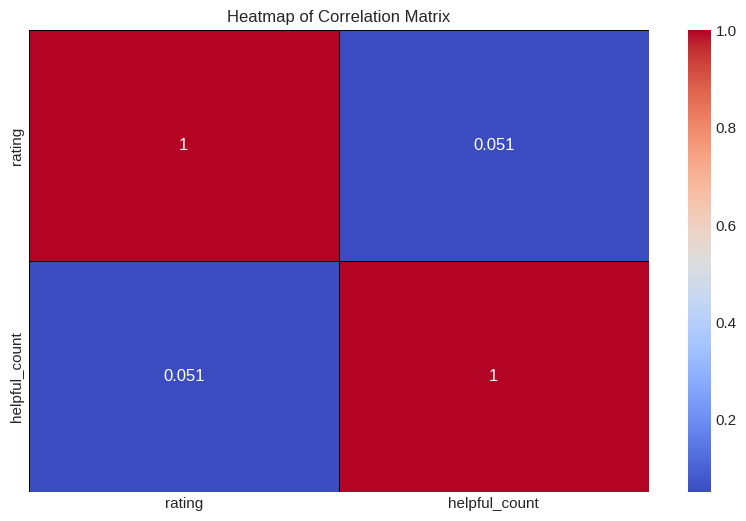

In [55]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [57]:
#install textblob
!pip install textblob
from textblob import TextBlob

In [58]:
# Function to classify sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply TextBlob sentiment analysis
data['polarity'] = data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['sentiment'] = data['polarity'].apply(classify_sentiment)

In [59]:
# Display the first few rows with sentiment
print(data[['content', 'polarity', 'sentiment']].head())

                                             content  polarity sentiment
0  Needed a new portable speaker for the home set...  0.341186  Positive
1  The Beats Pill (2024) has made a triumphant co...  0.289669  Positive
2  So I’m super picky about sound and have spent ...  0.290789  Positive
3  I really like the new Beats Pill 2024 speaker....  0.307318  Positive
4  This 2 pound speaker sounds insane for its siz...  0.076667  Positive


In [60]:
# Aggregate sentiment scores
sentiment_counts = data['sentiment'].value_counts()
average_polarity = data['polarity'].mean()

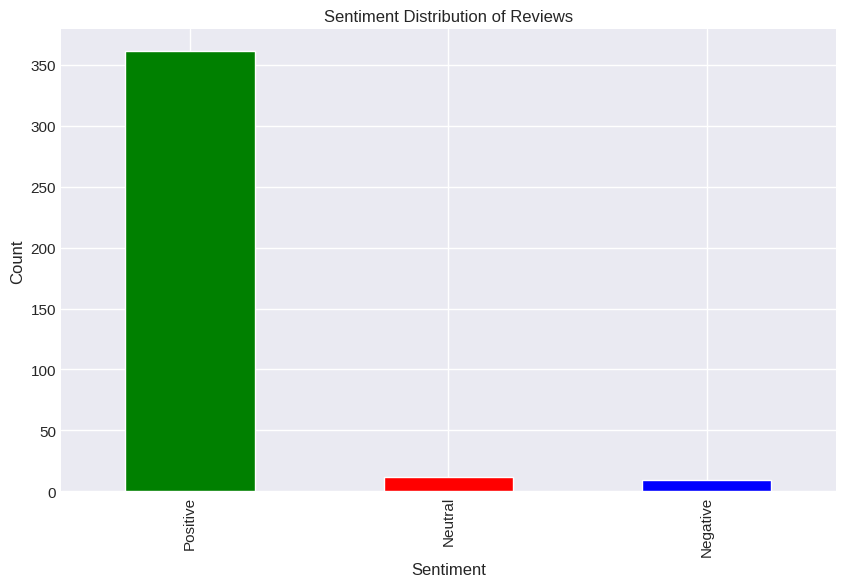

Sentiment counts:
sentiment
Positive    361
Neutral      12
Negative      9
Name: count, dtype: int64

Average polarity: 0.2810198240399534


In [61]:
# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print overall sentiment results
print(f"Sentiment counts:\n{sentiment_counts}")
print(f"\nAverage polarity: {average_polarity}")

**Exploratory Data Analysis (EDA) Findings:** The ratings are predominantly clustered at the higher end, with most reviews giving a rating of 5 stars. Box Plot further confirms that the majority of reviews are highly positive, as most of the helpful_count values are low and centered around higher ratings. On Scatter Plot, Higher ratings are associated with higher helpful_count values. This suggests that reviews with higher ratings are more likely to be considered helpful by other users.

**Correlation Matrix:**
From Heatmap it seems there is a moderate positive correlation between rating and helpful_count, indicating that *reviews with higher ratings tend to receive more helpful votes.* The is_verified status shows a weak correlation with other numeric variables, implying that verified reviews do not significantly differ in terms of ratings or helpfulness from non-verified ones. Verified reviews make up a substantial portion of the dataset, which could imply a higher trust level in these reviews.

**Sentiment Analysis Findings:**
The majority of reviews are classified as positive, with fewer negative and neutral reviews. This indicates that consumers generally have a favorable opinion of Beats by Dre products.
Average Polarity Score: A positive average polarity score reflects overall positive sentiment towards the products.This suggests that, on average, customers are satisfied with their purchases.

**Insights and Implications for Beats by Dre:** Beats by Dre enjoys strong positive sentiment from its customers, which is reflected in high ratings and helpful reviews. The company should capitalize on this positive feedback while addressing any identified issues to further enhance customer satisfaction and maintain a competitive edge.